In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

In [89]:
 # location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './인천/상업업무용/부평구.csv'
raw_all = pd.read_csv(location)
raw_all

,지역코드,시군구,법정동,유형,용도지역,건물주용도,건축년도,대지면적,건물면적,년,월,일,거래금액,거래유형,중개사소재지,해제사유발생일,해제여부,datetime,Datetime
0,28237,부평구,부평동,일반,일반상업,기타,"1,994.00",119.30,429.80,2006,1,5,"145,000",NaN,NaN,NaN,NaN,2006-01-05,2006-01-05
1,28237,부평구,부평동,집합,일반상업,제2종근린생활,"2,005.00",NaN,185.10,2006,1,5,"11,826",NaN,NaN,NaN,NaN,2006-01-05,2006-01-05
2,28237,부평구,부평동,집합,일반상업,제2종근린생활,"2,005.00",NaN,52.67,2006,1,6,"28,300",NaN,NaN,NaN,NaN,2006-01-06,2006-01-06
3,28237,부평구,부평동,집합,일반상업,제1종근린생활,"2,004.00",NaN,57.42,2006,1,9,"52,100",NaN,NaN,NaN,NaN,2006-01-09,2006-01-09
4,28237,부평구,부평동,집합,일반상업,제2종근린생활,"2,004.00",NaN,88.14,2006,1,10,520,NaN,NaN,NaN,NaN,2006-01-10,2006-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,28237,부평구,삼산동,집합,제3종일반주거,제2종근린생활,"2,004.00",NaN,24.18,2021,12,17,"18,000",중개거래,"경기 부천시, 인천 부평구",NaN,NaN,2021-12-17,2021-12-17
12736,28237,부평구,삼산동,집합,일반상업,제1종근린생활,"2,006.00",NaN,108.64,2021,12,22,"30,000",중개거래,인천 부평구,NaN,NaN,2021-12-22,2021-12-22
12737,28237,부평구,갈산동,집합,제3종일반주거,제2종근린생활,"1,992.00",NaN,15.54,2021,12,2,"4,400",중개거래,인천 부평구,NaN,NaN,2021-12-02,2021-12-02
12738,28237,부평구,갈산동,집합,제3종일반주거,제1종근린생활,"2,021.00",NaN,46.93,2021,12,6,"91,154",중개거래,경기 김포시,NaN,NaN,2021-12-06,2021-12-06


In [13]:
raw_all.describe(include='all').T
raw_all.isnull()
raw_all.isnull().sum()

지역코드            0
시군구             0
법정동             0
유형              0
용도지역            0
            ...  
중개사소재지      12667
해제사유발생일     12628
해제여부        12628
datetime        0
Datetime        0
Length: 19, dtype: int64

In [15]:
raw_all.set_index('Datetime', inplace=True)

In [ ]:
raw_all

In [96]:
raw_all['년'] = raw_all['년'].astype('string')
raw_all['월'] = raw_all['월'].astype('string')

In [97]:
raw_all['년월'] =raw_all['년'] +'-'+raw_all['월']

In [138]:
[raw_all[raw_all['년월']=='2021-9']['해제여부'].notna()==True]

12550    False
12551    False
12552    False
12553    False
12554    False
         ...  
12591    False
12592    False
12593    False
12594    False
12595    False
Name: 해제여부, Length: 46, dtype: bool

In [141]:
test= raw_all[raw_all['년월']=='2021-9']

In [142]:
test[test['해제여부'].notna()==True]

,지역코드,시군구,법정동,유형,용도지역,건물주용도,건축년도,대지면적,건물면적,년,월,일,거래금액,거래유형,중개사소재지,해제사유발생일,해제여부,datetime,Datetime,년월
12557,28237,부평구,부평동,일반,일반상업,기타,"1,996.00","3,356.00","23,166.61",2021,9,10,"3,905,890",NaN,NaN,21.10.22,O,2021-09-10,2021-09-10,2021-9
12577,28237,부평구,청천동,집합,일반공업,제2종근린생활,"2,020.00",NaN,45.58,2021,9,10,"63,172",NaN,NaN,21.11.09,O,2021-09-10,2021-09-10,2021-9
12586,28237,부평구,삼산동,집합,제3종일반주거,제2종근린생활,"2,000.00",NaN,31.50,2021,9,8,"49,500",NaN,NaN,22.01.11,O,2021-09-08,2021-09-08,2021-9


In [127]:
raw_all.groupby('년월').count().a

,지역코드,시군구,법정동,유형,용도지역,건물주용도,건축년도,대지면적,건물면적,년,월,일,거래금액,거래유형,중개사소재지,해제사유발생일,해제여부,datetime,Datetime
년월,,,,,,,,,,,,,,,,,,,
2006-1,43,43,43,43,43,43,43,7,43,43,43,43,43,0,0,0,0,43,43
2006-10,68,68,68,68,68,68,68,12,68,68,68,68,68,0,0,0,0,68,68
2006-11,85,85,85,85,85,85,85,16,85,85,85,85,85,0,0,0,0,85,85
2006-12,90,90,90,90,90,90,88,24,90,90,90,90,90,0,0,0,0,90,90
2006-2,62,62,62,62,62,62,62,7,62,62,62,62,62,0,0,0,0,62,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-5,111,111,111,111,111,111,109,11,111,111,111,111,111,0,0,7,7,111,111
2021-6,102,102,102,102,102,102,102,23,102,102,102,102,102,0,0,10,10,102,102
2021-7,70,70,70,70,70,70,70,13,70,70,70,70,70,0,0,6,6,70,70


<AxesSubplot:xlabel='년월'>

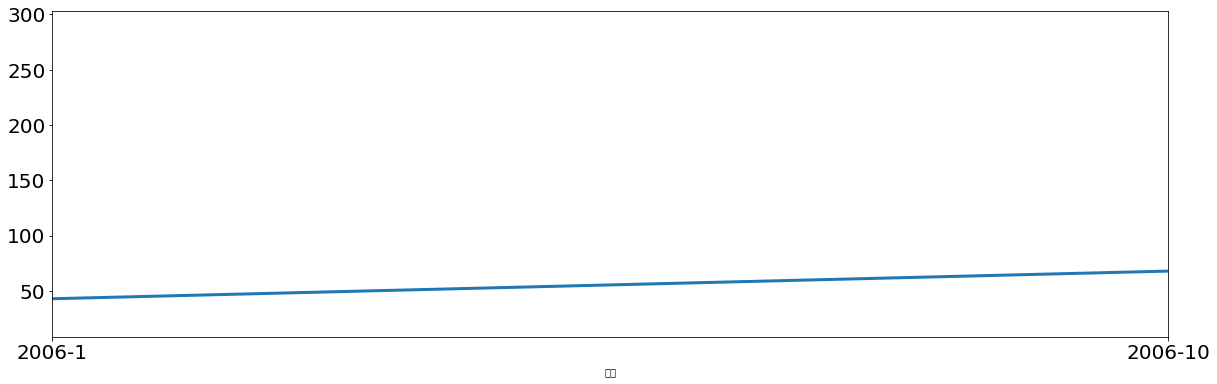

In [107]:
raw_all.groupby('년월').count()['지역코드'].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                              xlim=('2006-1', '20'))

In [ ]:
raw_all[['count','registered','casual']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                              xlim=('2012-01-01', '2012-06-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()